In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

#Load data
dataset = pd.read_csv(r'C:\Users\bryan\Desktop\Computer Stuff\Machine_Learning(2)\Machine Learning A-Z New\Part 2 - Regression\Section 4 - Simple Linear Regression\Salary_Data.csv')

dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


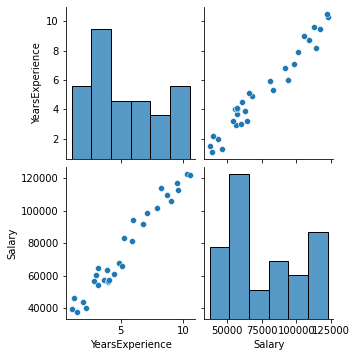

In [2]:
sns.pairplot(dataset)

In [3]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [4]:
#split data b/w training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

#Feature Scaling for testing and train
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.fit_transform(y_test.reshape(-1,1))


#LinearRegression used Ordinary Least Squares to determine the ciefficent and intercept
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
#print the coefficient and the intercept values after gradient descent

print(regressor.coef_)
print(regressor.intercept_)

[[0.9721711]]
[-3.02954897e-16]


In [6]:
#Predicting the Test set results

y_pred = regressor.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred) #calculates the mean of the error

0.037994675284197435

In [8]:
from sklearn.metrics import r2_score

# R2 determines the fit of the regression line. A score of 1 is a perfect fit. 

r2 = r2_score(y_test, y_pred)
r2

0.9620053247158026

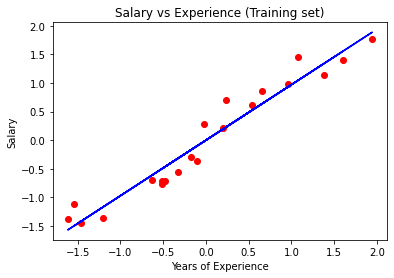

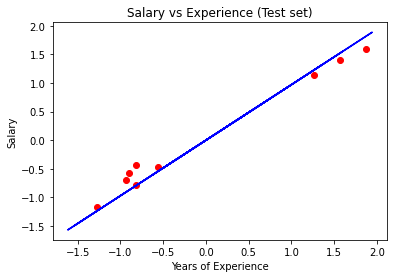

In [9]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()